# Exercise 8 | Anomaly Detection and Collaborative Filtering



In [146]:
# Initialization
from ex8func import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as scio
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 1: Load Example Dataset
We start this exercise by using a small dataset that is easy to
visualize.
Our example case consists of 2 network server statistics across
several machines: the latency and throughput of each machine.
This exercise will help us find possibly faulty (or very fast) machines.



Visualizing example dataset for outlier detection.




Text(0, 0.5, 'Throughput (mb/s)')

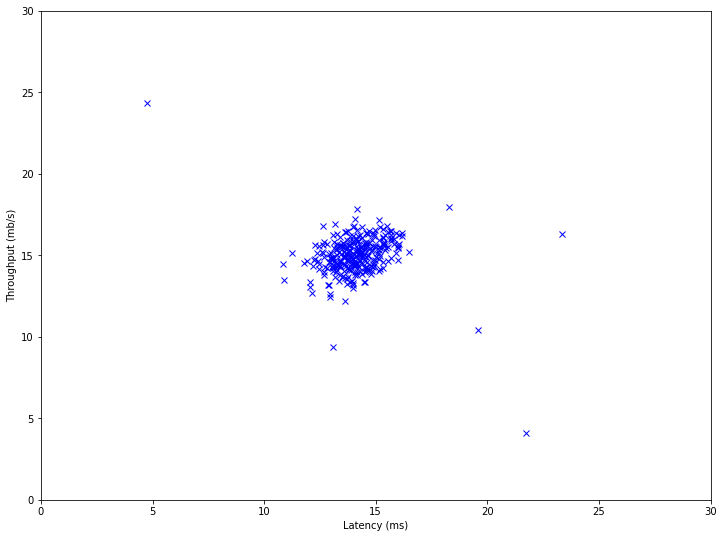

In [147]:
print('Visualizing example dataset for outlier detection.\n\n')
data = scio.loadmat('ex8data1.mat')
X,Xval,yval=data['X'],data['Xval'],data['yval'][:,0]
# Visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bx')
plt.axis([0,30,0,30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

## Part 2: Estimate the dataset statistics
For this exercise, we assume a Gaussian distribution for the dataset.
We first estimate the parameters of our assumed Gaussian distribution,
then compute the probabilities for each of the points and then visualize
both the overall distribution and where each of the points falls in
terms of that distribution.

Visualizing Gaussian fit.


[1.e-20 1.e-17 1.e-14 1.e-11 1.e-08 1.e-05 1.e-02]


Text(0, 0.5, 'Throughput (mb/s)')

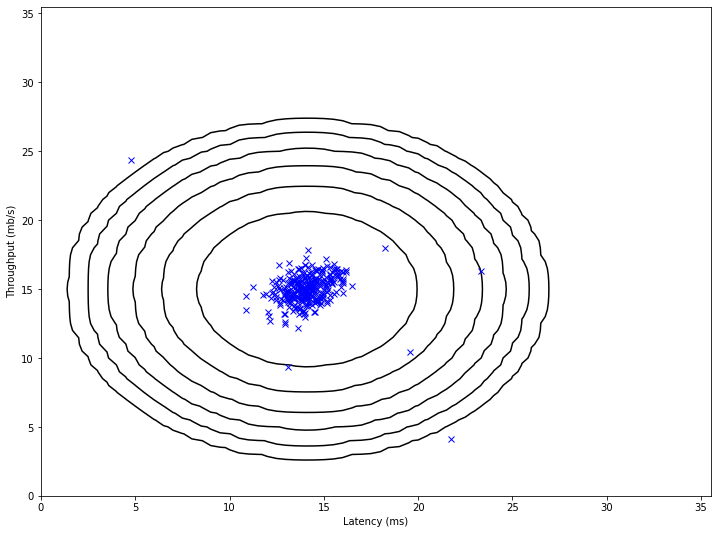

In [148]:
print('Visualizing Gaussian fit.\n\n')
mu, sigma2 = estimateGaussian(X)
p = multivariateGaussian(X, mu, sigma2)
# Visualize the fit
visualizeFit(X,  mu, sigma2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

## Part 3: Find Outliers
Now you will find a good epsilon threshold using a cross-validation set
probabilities given the estimated Gaussian distribution

C:\Users\hanlu\Desktop\ML\ex8\Python\ex8func.py:45: RuntimeWarning: invalid value encountered in long_scalars


Best epsilon found using cross-validation: 8.990853e-05

Best F1 on Cross Validation Set:  0.875000

   (you should see a value epsilon of about 8.99e-05)

   (you should see a Best F1 value of  0.875000)


[1.e-20 1.e-17 1.e-14 1.e-11 1.e-08 1.e-05 1.e-02]


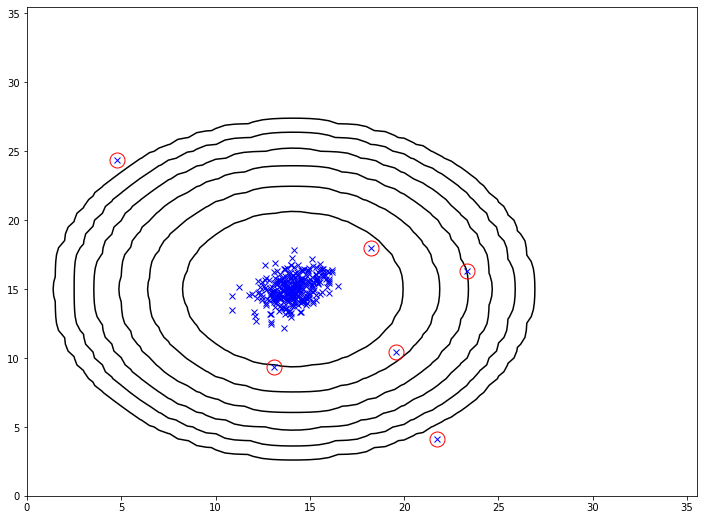

In [149]:
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print('Best epsilon found using cross-validation: %e\n'% epsilon)
print('Best F1 on Cross Validation Set:  %f\n'% F1)
print('   (you should see a value epsilon of about 8.99e-05)\n')
print('   (you should see a Best F1 value of  0.875000)\n\n')
visualizeFit(X,  mu, sigma2)
outliers = np.argwhere(p < epsilon)[:,0]
plt.plot(X[outliers, 0], X[outliers, 1], 'o',c='none',markeredgecolor='r',markersize=15,linewidth=5)

## Part 4: Multidimensional Outliers
We will now use the code from the previous part and apply it to a
harder problem in which more features describe each datapoint and only
some features indicate whether a point is an outlier.

In [150]:
data = scio.loadmat('ex8data2.mat')
X,Xval,yval=data['X'],data['Xval'],data['yval'][:,0]
mu,sigma2 = estimateGaussian(X)
p = multivariateGaussian(X, mu, sigma2)
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon,F1 = selectThreshold(yval, pval)
print('Best epsilon found using cross-validation: %e\n'% epsilon)
print('Best F1 on Cross Validation Set:  %f\n'% F1)
print('   (you should see a value epsilon of about 1.38e-18)\n')
print('   (you should see a Best F1 value of 0.615385)\n')
print('# Outliers found: %d\n\n' % sum(p < epsilon))

C:\Users\hanlu\Desktop\ML\ex8\Python\ex8func.py:45: RuntimeWarning: invalid value encountered in long_scalars


Best epsilon found using cross-validation: 1.377229e-18

Best F1 on Cross Validation Set:  0.615385

   (you should see a value epsilon of about 1.38e-18)

   (you should see a Best F1 value of 0.615385)

# Outliers found: 117


